In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ananyaw","key":"f3b037bb430fc9fd67e21a62f98ee892"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download subirbiswas19/skin-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
 29% 5.00M/17.3M [00:00<00:00, 49.4MB/s]
100% 17.3M/17.3M [00:00<00:00, 98.0MB/s]


In [ ]:
!unzip \*.zip

Archive:  skin-disease-dataset.zip
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (147).jpg  
  inflating: skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (148).jpg  
  inflating: skin-di

In [ ]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
os.listdir()

['.config',
 'kaggle.json',
 'skin-disease-dataset.zip',
 'skin-disease-datasaet',
 'kaggle (1).json',
 'sample_data']

In [ ]:
dataset_url = '/content/skin-disease-datasaet/train_set'

In [ ]:
os.listdir(dataset_url)

['FU-nail-fungus',
 'BA-impetigo',
 'PA-cutaneous-larva-migrans',
 'VI-shingles',
 'FU-athlete-foot',
 'FU-ringworm',
 'VI-chickenpox',
 'BA- cellulitis']

In [ ]:
dataset_url

'/content/skin-disease-datasaet/train_set'

In [ ]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/content/skin-disease-datasaet/train_set')

In [ ]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [ ]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [ ]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [ ]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [ ]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [ ]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [ ]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [ ]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

**Data Loading**

In [ ]:
train_dir = '/content/skin-disease-datasaet/train_set'
test_dir = '/content/skin-disease-datasaet/test_set'

In [ ]:
total_train_images = 0
total_test_images = 0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Train - {category}: {num_images} images")
    total_train_images += num_images

Train - FU-nail-fungus: 129 images
Train - BA-impetigo: 80 images
Train - PA-cutaneous-larva-migrans: 100 images
Train - VI-shingles: 130 images
Train - FU-athlete-foot: 124 images
Train - FU-ringworm: 90 images
Train - VI-chickenpox: 136 images
Train - BA- cellulitis: 136 images


In [ ]:
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    num_images = len(os.listdir(category_dir))
    print(f"Test - {category}: {num_images} images")
    total_test_images += num_images

print(f"Total train images: {total_train_images}")
print(f"Total test images: {total_test_images}")

Test - FU-nail-fungus: 33 images
Test - BA-impetigo: 20 images
Test - PA-cutaneous-larva-migrans: 25 images
Test - VI-shingles: 33 images
Test - FU-athlete-foot: 32 images
Test - FU-ringworm: 23 images
Test - VI-chickenpox: 34 images
Test - BA- cellulitis: 34 images
Total train images: 925
Total test images: 234


**Visualizations in training set**

In [ ]:
import seaborn as sns

In [ ]:
classes =os.listdir('/content/skin-disease-datasaet/train_set')
classes = sorted(classes)
classes

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

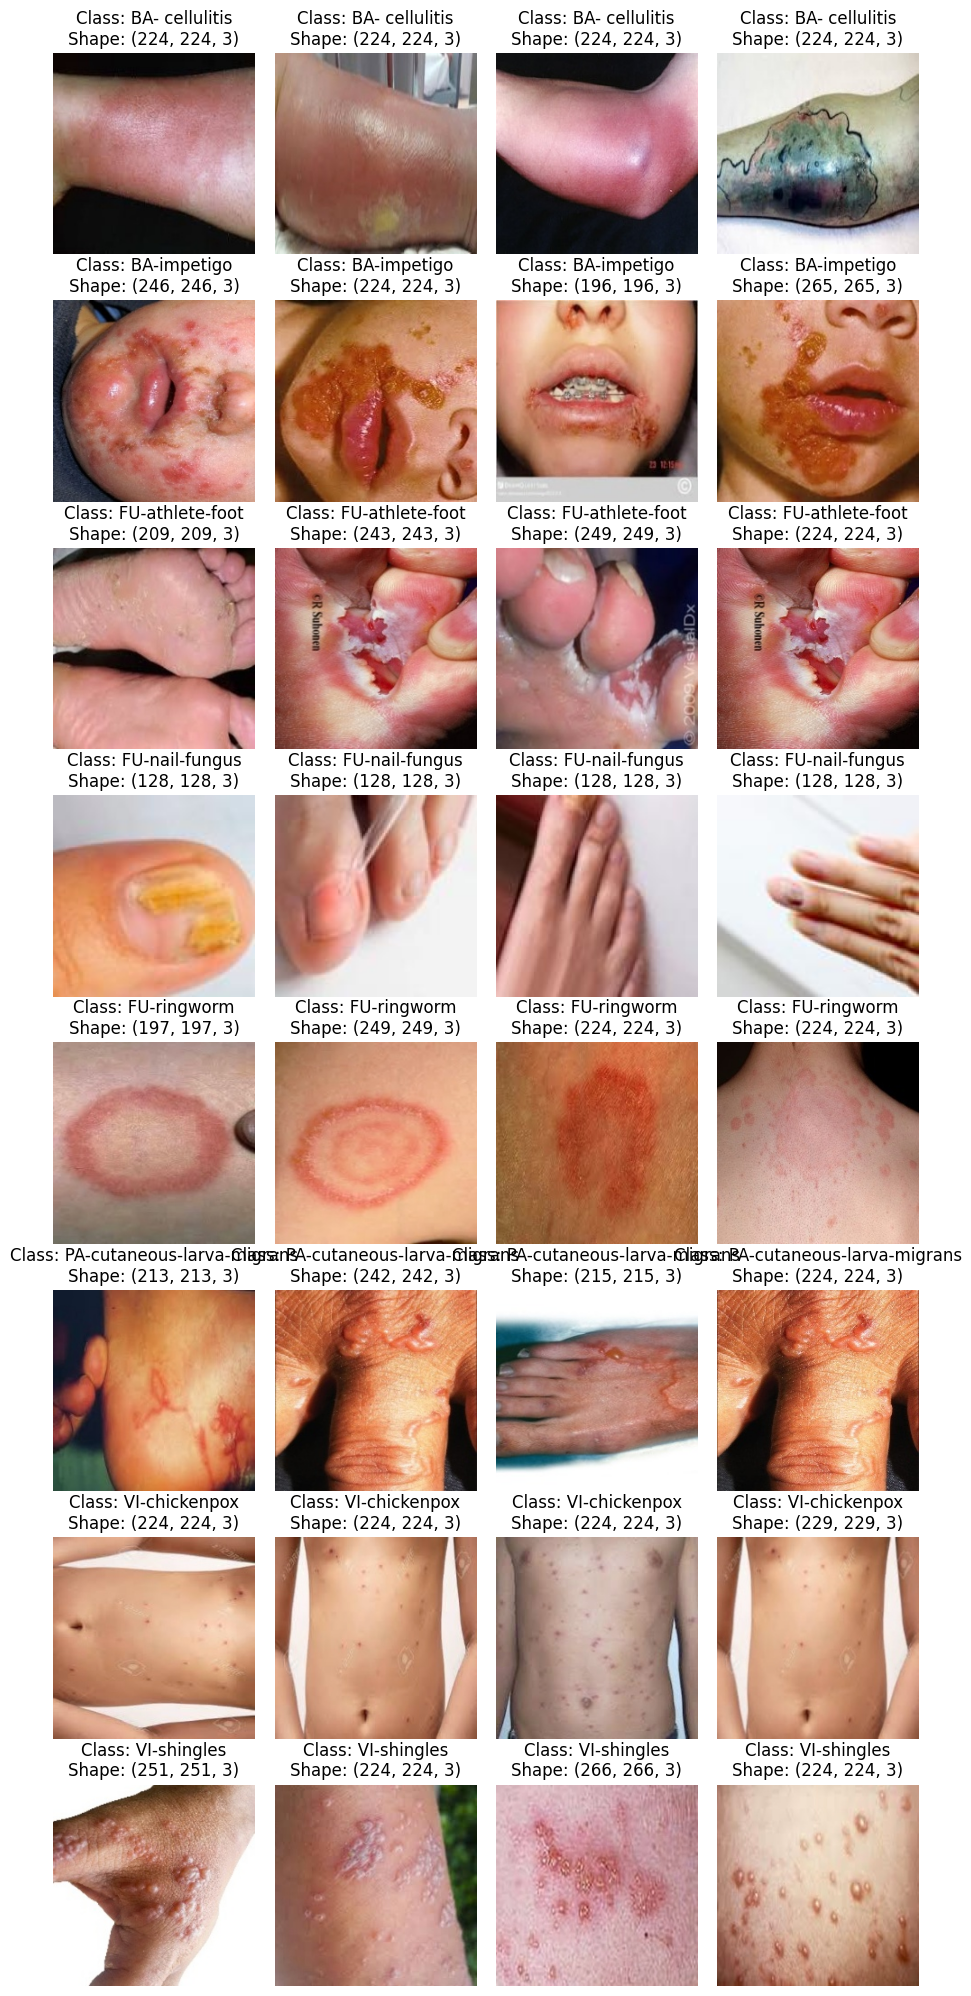

In [ ]:
import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import os
from pathlib import Path

NUM_IMAGES = 4

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (9, 20))

p = 0

for c in classes:

    img_path_class = list(Path(os.path.join(train_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

In [ ]:
classes = os.listdir("/content/skin-disease-datasaet/test_set")
classes = sorted(classes)

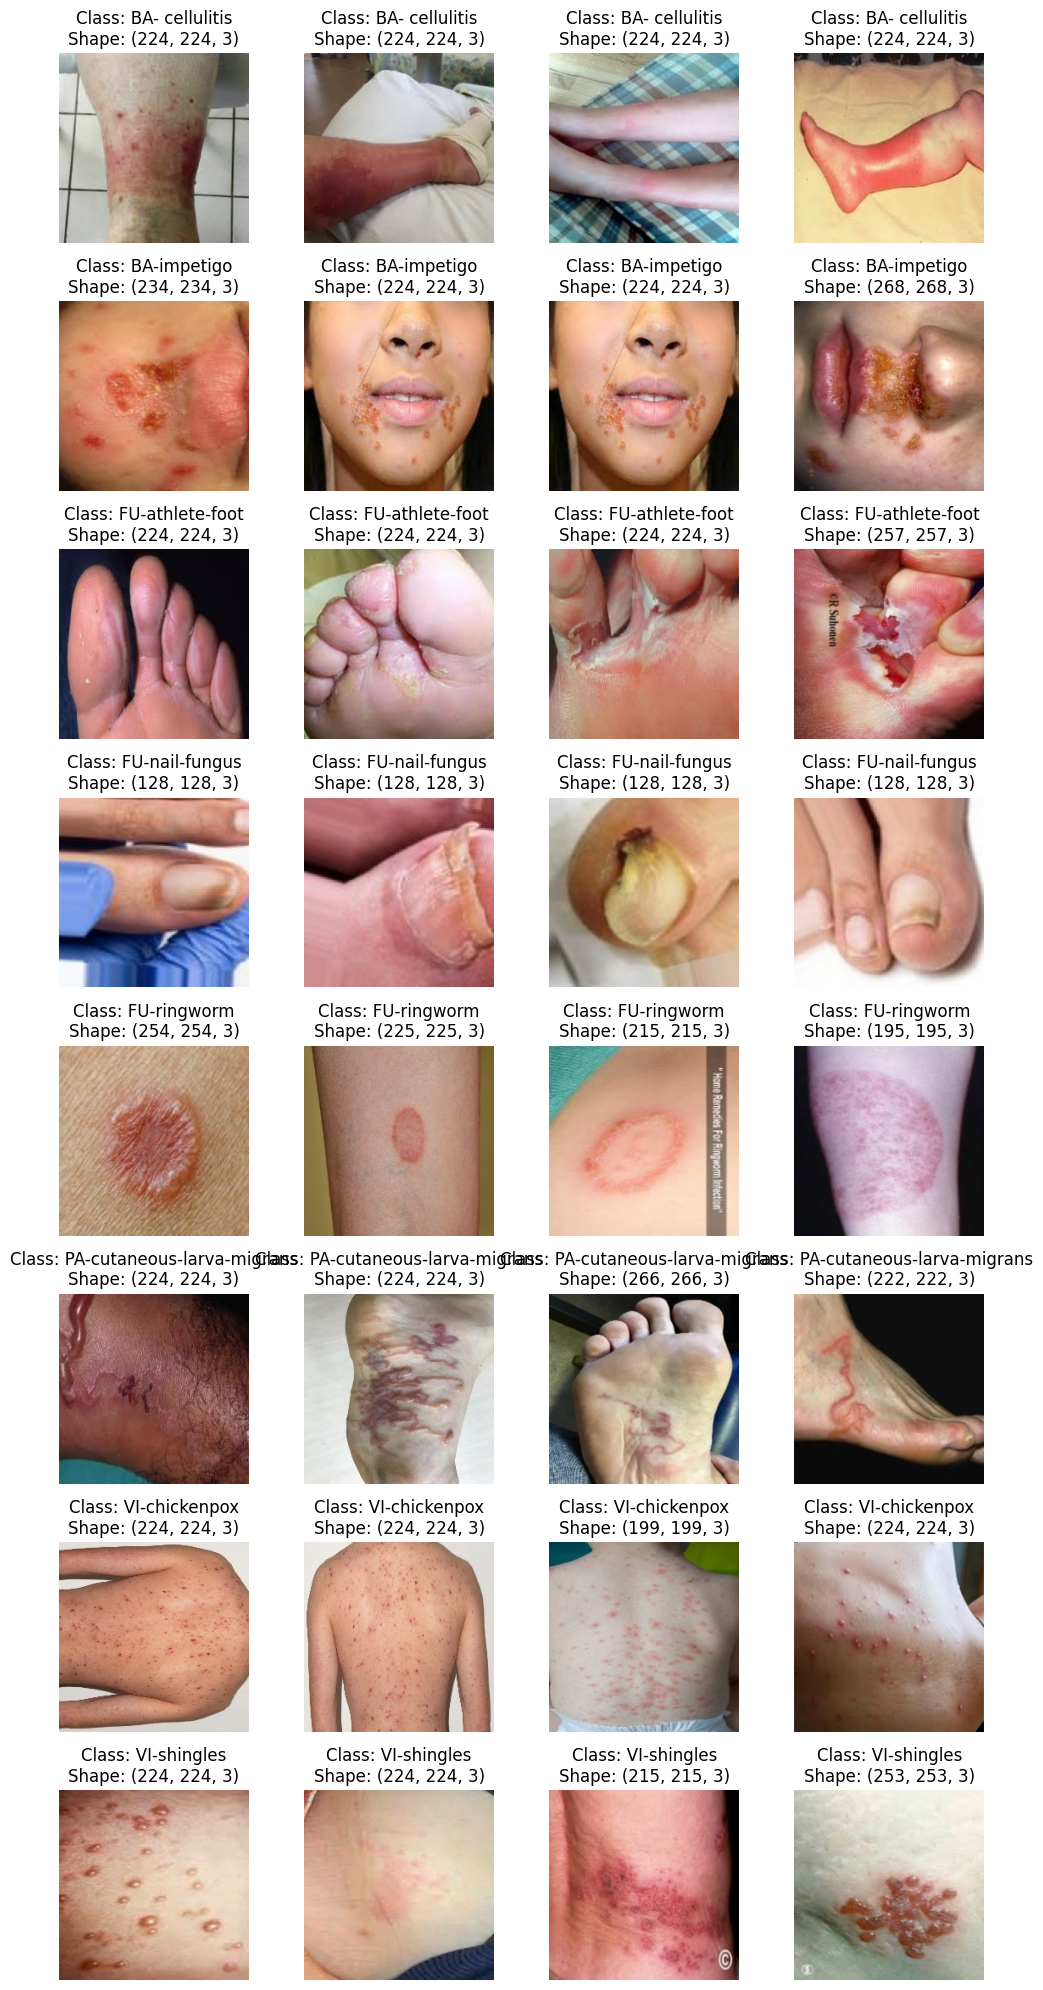

In [ ]:

import pathlib
import random
import cv2
import matplotlib.pyplot as plt
import os
from pathlib import Path
NUM_IMAGES = 4

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 20))

p = 0

for c in classes:
    img_path_class = list(Path(os.path.join(test_dir,c)).glob("*.jpg"))
    img_selected = random.choices(img_path_class, k = NUM_IMAGES)
    for i,j in enumerate(img_selected):
        img_bgr = cv2.imread(str(j))
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_rgb)
        ax[p,i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
        ax[p,i].axis('off')

    p += 1

fig.tight_layout()
fig.show()

VI-chickenpox                 136
BA- cellulitis                136
VI-shingles                   130
FU-nail-fungus                129
FU-athlete-foot               124
PA-cutaneous-larva-migrans    100
FU-ringworm                    90
BA-impetigo                    80
Name: count, dtype: int64


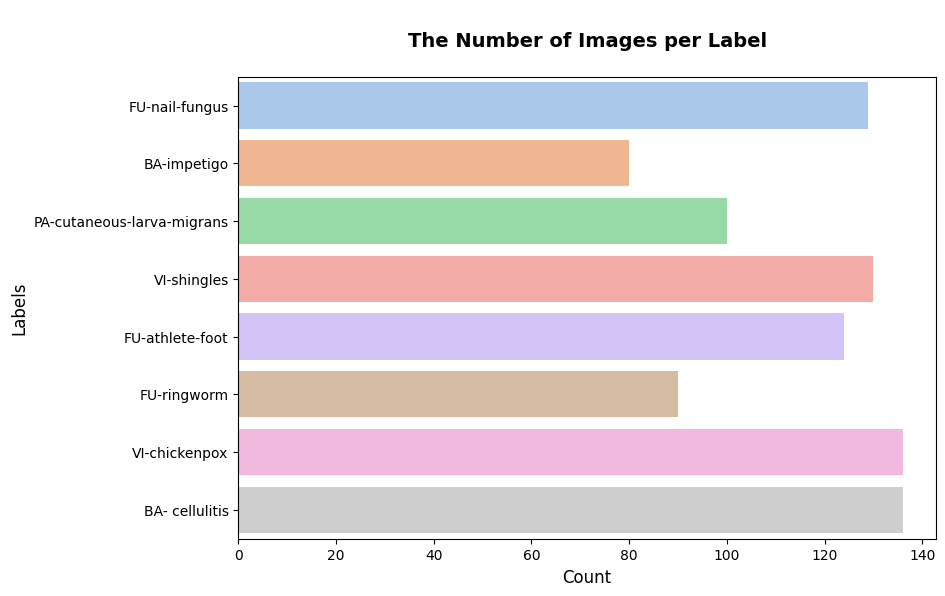

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = '/content/skin-disease-datasaet/train_set'

root_labels = []

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    root_labels.extend([category] * len(os.listdir(category_dir)))

if root_labels:
    root_labels_series = pd.Series(root_labels)
    print(root_labels_series.value_counts())


    unique_labels = root_labels_series.unique()
    palette = sns.color_palette("pastel", len(unique_labels))

    # Plot
    plt.figure(figsize=(9, 6))
    sns.countplot(y=root_labels_series, palette=palette)
    plt.title("\nThe Number of Images per Label\n", weight="bold", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Labels", fontsize=12)
    plt.show()
else:
    print("Error: root_labels is empty!")


Class: FU-nail-fungus, Number of images: 129
Class: BA-impetigo, Number of images: 80
Class: PA-cutaneous-larva-migrans, Number of images: 100
Class: VI-shingles, Number of images: 130
Class: FU-athlete-foot, Number of images: 124
Class: FU-ringworm, Number of images: 90
Class: VI-chickenpox, Number of images: 136
Class: BA- cellulitis, Number of images: 136
Batch size: 8


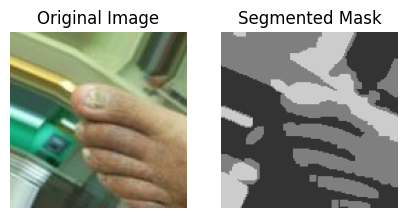

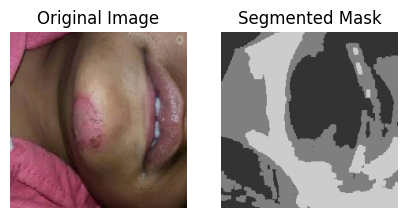

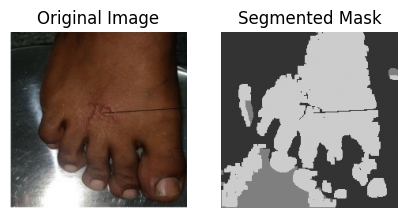

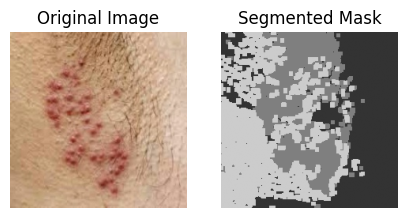

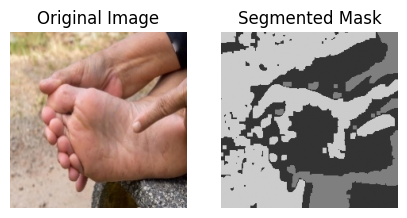

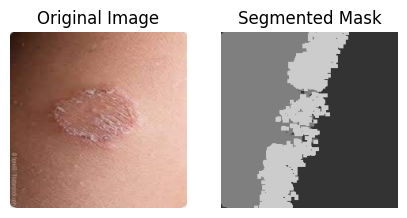

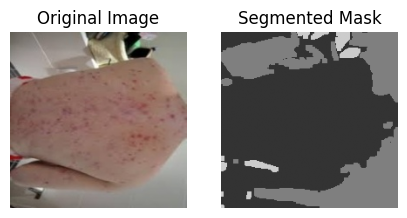

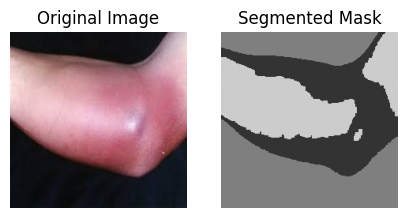

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

train_dir = '/content/skin-disease-datasaet/train_set'
data_dict = {}

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        data_dict[category] = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]

assert data_dict, "Error: data_dict is empty!"
for key, value in data_dict.items():
    print(f"Class: {key}, Number of images: {len(value)}")

n_clusters = 3
random.seed(42)

batch = []
for lab in data_dict:
    img_path = random.choice(data_dict[lab])
    img = cv2.imread(img_path)
    if img is not None:
        batch.append(img)
    else:
        print(f"Warning: Failed to load image {img_path}")

assert batch, "Error: Batch is empty!"
print(f"Batch size: {len(batch)}")

for i, img in enumerate(batch):
    if len(img.shape) != 3:
        raise ValueError(f"Invalid image shape: {img.shape}")

    w, h, channel = img.shape
    X = np.reshape(img, (w * h, channel))

    kmeans = KMeans(n_clusters, random_state=0, n_init='auto').fit(X)
    pred_label = kmeans.predict(X)
    pred_label = np.reshape(pred_label, (h, w))

    mask = np.zeros(shape=(h, w, channel))
    mask_colors = [
        (0.2, 0.2, 0.2),
        (0.5, 0.5, 0.5),
        (0.8, 0.8, 0.8)
    ]

    for cluster_idx in range(n_clusters):
        mask[pred_label == cluster_idx] = mask_colors[cluster_idx]

    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=2)

    fg, ax = plt.subplots(1, 2, figsize=(5, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0)  # Convert BGR to RGB
    ax[0].set_title(f"Original Image")
    ax[0].axis('off')

    ax[1].imshow(mask)
    ax[1].set_title(f'Segmented Mask')
    ax[1].axis('off')

    plt.show()


Data Preprocessing


In [ ]:
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('normal/*')),
}

In [ ]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [ ]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [ ]:

print("The shape is:")
x_train[0].shape

The shape is:


(224, 224, 3)

In [ ]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(925,)

In [ ]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/content/skin-disease-datasaet/train_set')

In [ ]:
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
#     'normal':list(data_dir.glob('test_set/normal/*')),
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
#     'normal':8,
}

In [ ]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_test.shape

(925, 224, 224, 3)

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.40784314, 0.51764706, 0.58431373],
        [0.40784314, 0.51764706, 0.58431373],
        [0.40784314, 0.51764706, 0.58431373],
        ...,
        [0.        , 0.02745098, 0.10588235],
        [0.0627451 , 0.10588235, 0.16078431],
        [0.40392157, 0.45098039, 0.49803922]],

       [[0.40784314, 0.51764706, 0.58431373],
        [0.40784314, 0.51764706, 0.58431373],
        [0.40784314, 0.51764706, 0.58431373],
        ...,
        [0.        , 0.03529412, 0.11372549],
        [0.04313725, 0.08627451, 0.14117647],
        [0.36470588, 0.41176471, 0.45882353]],

       [[0.40392157, 0.51372549, 0.58039216],
        [0.40784314, 0.51764706, 0.58431373],
        [0.40392157, 0.51372549, 0.58039216],
        ...,
        [0.        , 0.03529412, 0.11372549],
        [0.00392157, 0.04705882, 0.10196078],
        [0.28235294, 0.32941176, 0.37647059]],

       ...,

       [[0.30980392, 0.34509804, 0.4       ],
        [0.31372549, 0.34901961, 0.40392157],
        [0.3254902 , 0

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense


In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(224, 224, 3),
    trainable=False
)

In [ ]:
x_train_scaled.shape

(925, 224, 224, 3)

In [ ]:
model=keras.Sequential(
    [
        feature_extractor_layer,
        keras.layers.Dense(9,activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=15)


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7fda2541fdc0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)